# FORNAX 3D Neutrino Spectra

Some I/O and plotting using the Fornax 3D models from [Vartanyan, Burrows, et al., MNRAS 482(1):351, 2019](https://arxiv.org/abs/1809.05106), which express the angular dependence of the neutrino luminosity from CCSNe in terms of a spherical harmonic expansion up to order $\ell=2$.

The data are available on [the Burrows group website](https://www.astro.princeton.edu/~burrows/nu-emissions.3d/).

In [1]:
from snewpy.neutrino import Flavor
from snewpy.models import Fornax_2019_3D

from astropy import units as u

from glob import glob

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
mpl.rc('font', size=16)

## Test Instantiation using a $10M_{\odot}$ Model

In [3]:
model = Fornax_2019_3D('../../models/Fornax_2019/lum_spec_10M.h5')
model

**Fornax 3D Model**: ../../models/Fornax_2019/lum_spec_10M.h5

|Parameter|Value|
|:---------|:-----:|
|Progenitor mass | $10$ $\mathrm{M_{\odot}}$|

In [4]:
model.get_time()

<Quantity [0.01      , 0.011     , 0.012     , 0.013     , 0.014     ,
           0.015     , 0.016     , 0.017     , 0.018     , 0.019     ,
           0.02      , 0.021     , 0.022     , 0.023     , 0.024     ,
           0.025     , 0.026     , 0.027     , 0.028     , 0.029     ,
           0.03      , 0.031     , 0.032     , 0.033     , 0.034     ,
           0.035     , 0.036     , 0.037     , 0.038     , 0.039     ,
           0.04      , 0.041     , 0.042     , 0.043     , 0.044     ,
           0.045     , 0.046     , 0.047     , 0.048     , 0.049     ,
           0.05      , 0.05034647, 0.051     , 0.052     , 0.053     ,
           0.054     , 0.055     , 0.056     , 0.057     , 0.058     ,
           0.059     , 0.06      , 0.061     , 0.062     , 0.063     ,
           0.064     , 0.065     , 0.066     , 0.067     , 0.068     ,
           0.069     , 0.07      , 0.071     , 0.072     , 0.073     ,
           0.074     , 0.075     , 0.076     , 0.077     , 0.078     ,
      

In [5]:
t = 200 * u.ms
E = np.arange(0,101) * u.MeV
theta = 20*u.degree
phi = 20*u.degree

spectra = model.get_initialspectra(t, E, theta, phi)

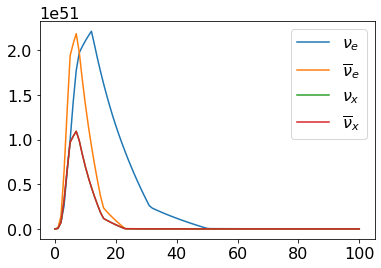

In [6]:
for flavor in Flavor:
    plt.plot(E, spectra[flavor], label=flavor.to_tex())
plt.legend()

## Test Caching of Full Model Angular Dependence

In [7]:
model = Fornax_2019_3D('../../models/Fornax_2019/lum_spec_10M.h5', cache_flux=True)
model

**Fornax 3D Model**: ../../models/Fornax_2019/lum_spec_10M.h5

|Parameter|Value|
|:---------|:-----:|
|Progenitor mass | $10$ $\mathrm{M_{\odot}}$|

In [8]:
model.dLdE[Flavor.NU_E][0]

<Quantity [[3.32634213e+49, 3.32634191e+49, 3.32634191e+49, ...,
            3.32634191e+49, 3.32634191e+49, 3.32634213e+49],
           [1.38957613e+50, 1.38957604e+50, 1.38957603e+50, ...,
            1.38957604e+50, 1.38957603e+50, 1.38957613e+50],
           [6.82481312e+50, 6.82481267e+50, 6.82481266e+50, ...,
            6.82481267e+50, 6.82481266e+50, 6.82481311e+50],
           ...,
           [1.36009389e+45, 1.36009380e+45, 1.36009380e+45, ...,
            1.36009380e+45, 1.36009380e+45, 1.36009389e+45],
           [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
            0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
           [4.86337880e+38, 4.86337848e+38, 4.86337848e+38, ...,
            4.86337848e+38, 4.86337847e+38, 4.86337880e+38]] erg / (MeV s)>

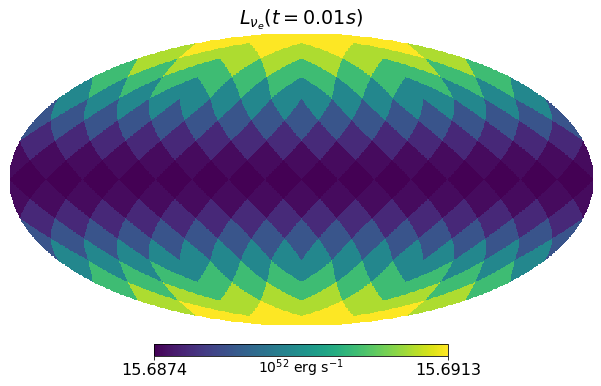

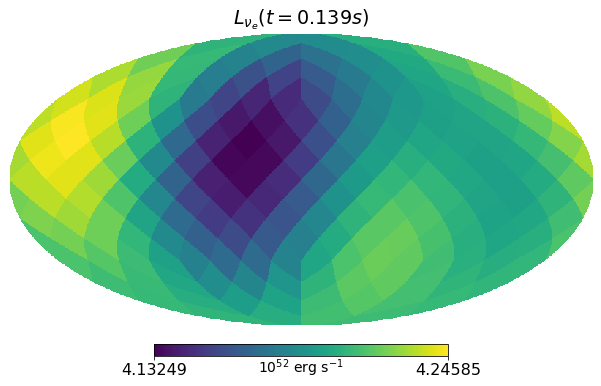

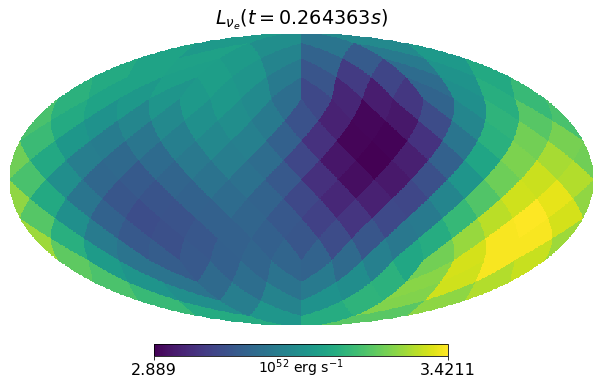

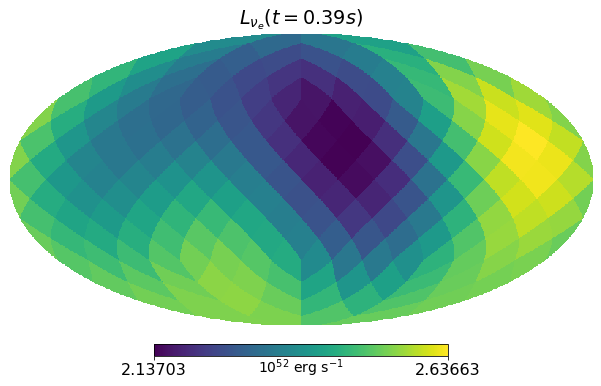

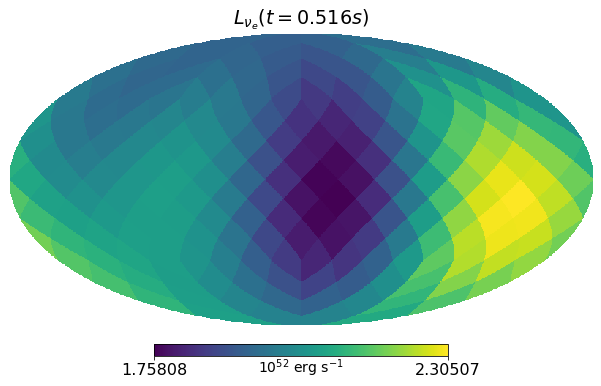

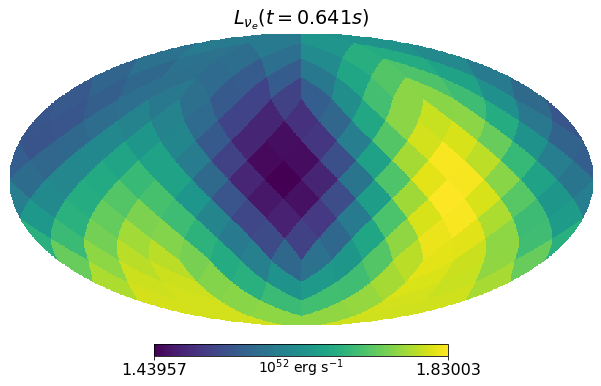

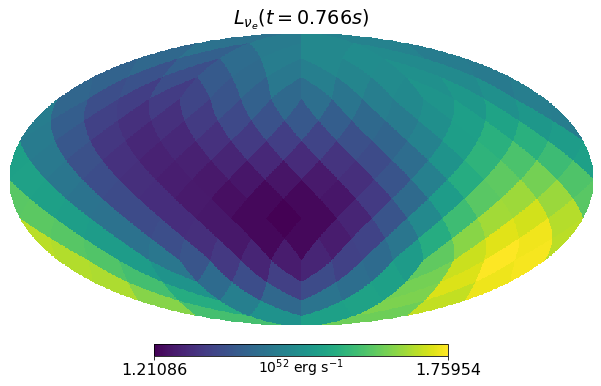

In [11]:
import healpy as hp

nt = len(model.time)
L = model.luminosity[Flavor.NU_E].to('1e52*erg/s')

for j in np.arange(0, nt, nt//6):
    hp.mollview(L[j], title=r'$L_{{\nu_e}}(t={:g})$'.format(model.time[j]),
            unit=r'$10^{52}$ erg s$^{-1}$')

### Plot $L_\nu(t,\theta,\varphi)$ at a Particular Location

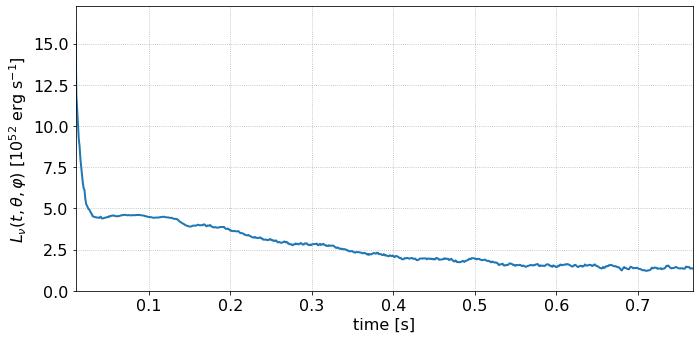

In [13]:
k = 55

fig, ax = plt.subplots(1,1, figsize=(10,5), tight_layout=True)
ax.plot(model.time, L[:,k], lw=2)
ax.set(xlabel='time [s]',
       xlim=model.time[0::len(model.time)-1].value,
       ylabel=r'$L_{\nu}(t,\theta,\varphi)$ [$10^{52}$ erg s$^{-1}$]',
       ylim=(0, 1.1*np.max(L).value))
ax.grid(ls=':');

### Superimpose $L_\nu(t,\theta,\varphi)$ at All Locations on the Sphere

Plot $L(t)$ at all locations as well as the average, and then the deviation from the average.

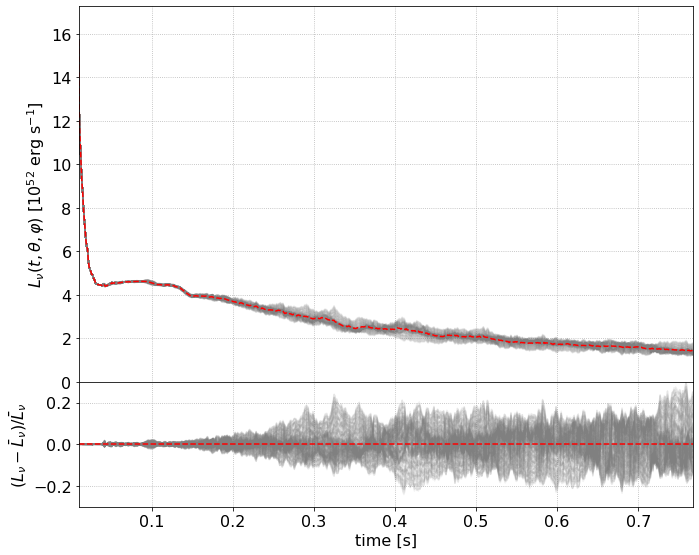

In [16]:
Lavg = np.average(L, axis=1)
dL_over_L = (L - Lavg[:,np.newaxis]) / Lavg[:,np.newaxis]

fig, axes = plt.subplots(2,1, figsize=(10,8),
                         gridspec_kw = {'height_ratios':[3,1], 'hspace':0},
                         sharex=True, tight_layout=True)

ax = axes[0]
ax.plot(model.time, L, color='gray', alpha=0.05)
ax.plot(model.time, Lavg, color='r', ls='--')
ax.set(xlim=model.time[0::len(model.time)-1].value,
       ylabel=r'$L_{\nu}(t,\theta,\varphi)$ [$10^{52}$ erg s$^{-1}$]',
       ylim=(0, 1.1*np.max(L).value))
ax.grid(ls=':')

ax = axes[1]
ax.plot(model.time, dL_over_L, color='gray', alpha=0.1)
ax.plot(model.time, np.zeros(model.time.shape), ls='--', color='r')
ax.set(xlabel='time [s]',
       ylabel=r'$(L_\nu - \bar{L}_\nu)/\bar{L}_\nu$',
       ylim=(-0.3, 0.3))
ax.grid(ls=':');